https://www.projectpro.io/article/multi-class-classification-python-example/547

In [1]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np



In [2]:
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re

In [5]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [7]:
data = pd.read_csv('/content/dataset_cyberbullying.csv')

In [8]:
#data = data[0:30000]

In [9]:
data.head()

,Text,Labels
0,@AAlwuhaib1977 Muslim mob violence against Hin...,racism
1,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism
2,@HuffPostRelig Islam invaded and conquered 2/3...,racism
3,@semzyxx Do you approve of your pedophile prop...,racism
4,@watan71969 @geeky_zekey Problem with vile Mus...,racism


In [10]:
data['Labels'].unique()

array(['racism', 'not_cyberbullying', 'gender', 'religion',
       'other_cyberbullying', 'age', 'ethnicity'], dtype=object)

In [11]:
data['Labels'] = data['Labels'].str.replace('other_cyberbullying','not_cyberbullying')

In [12]:
data['Labels'].unique()

array(['racism', 'not_cyberbullying', 'gender', 'religion', 'age',
       'ethnicity'], dtype=object)

In [13]:
#LowerCase
x=data['Text'].str.strip().str.lower()
x.head()

0    @aalwuhaib1977 muslim mob violence against hin...
1    @jncatron @isra_jourisra @ampalestine islamoph...
2    @huffpostrelig islam invaded and conquered 2/3...
3    @semzyxx do you approve of your pedophile prop...
4    @watan71969 @geeky_zekey problem with vile mus...
Name: Text, dtype: object

In [14]:
x[0]

'@aalwuhaib1977 muslim mob violence against hindus in bangladesh continues in 2014. #islam http://t.co/c1jbwjwurc'

In [15]:
## Remove links
def remove_link(data):
  return re.sub(r'https?://[^ ]+', '', data)

x= x.apply(lambda x:remove_link(x))
x.head()

0    @aalwuhaib1977 muslim mob violence against hin...
1    @jncatron @isra_jourisra @ampalestine islamoph...
2    @huffpostrelig islam invaded and conquered 2/3...
3    @semzyxx do you approve of your pedophile prop...
4    @watan71969 @geeky_zekey problem with vile mus...
Name: Text, dtype: object

In [16]:

## Remove user name
def remove_username(data):
  return re.sub(r'@[^ ]+', '', data)

x= x.apply(lambda x:remove_username(x))
x.head()



0     muslim mob violence against hindus in banglad...
1       islamophobia is like the idea of naziphobia...
2     islam invaded and conquered 2/3 of christiand...
3     do you approve of your pedophile prophet rapi...
4      problem with vile muslims is that they try t...
Name: Text, dtype: object

In [17]:

## Remove hashTag
def remove_hashTag(data):
  return re.sub(r'#', '', data)

x= x.apply(lambda x:remove_hashTag(x))
x.head()



0     muslim mob violence against hindus in banglad...
1       islamophobia is like the idea of naziphobia...
2     islam invaded and conquered 2/3 of christiand...
3     do you approve of your pedophile prophet rapi...
4      problem with vile muslims is that they try t...
Name: Text, dtype: object

In [18]:
## Remove punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree


#storing the puntuation free text
x= x.apply(lambda x:remove_punctuation(x))
x.head()

0     muslim mob violence against hindus in banglad...
1       islamophobia is like the idea of naziphobia...
2     islam invaded and conquered 23 of christiando...
3     do you approve of your pedophile prophet rapi...
4      problem with vile muslims is that they try t...
Name: Text, dtype: object

In [20]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(lemm_text)

In [23]:
import spacy

In [24]:
def lemmatize_words(texts,allowed_tags=["NOUN","ADJ","VERB","ADV"]):
  nlp = spacy.load("en_core_web_sm",disable=["parser","ner"])
  text_out = []
  for text in texts:
    doc =nlp(text)
    new_text = []
    for token in doc:
      if token.pos_ in allowed_tags and (not token.is_punct):
        new_text.append(token.lemma_)            #taking the lemmatize token which should be either "NOUN","ADJ","VERB","ADV"
    final = " ".join(new_text)
    text_out.append(final)
  
  return text_out

In [25]:
lemmatize_text = lemmatize_words(x.tolist())

In [26]:
#x=x.apply(lambda x:lemmatizer(x))

In [27]:
lemmatize_text[0:2]

['violence hindus continue', 'islamophobia idea religion hate outlaw']

In [28]:
x= pd.Series(lemmatize_text)

In [29]:
x.head()

0                             violence hindus continue
1               islamophobia idea religion hate outlaw
2    invade conquer christiandom christian crusade ...
3    approve pedophile prophet rape year old girl s...
4    problem vile muslim try rationalize amp excuse...
dtype: object

In [30]:
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def remove_stopwords(text):
  stopwordfree=" ".join([i for i in text.split() if i not in stopwords.words('english')])
  return stopwordfree


x= x.apply(lambda x:remove_stopwords(x))
x.head()

0                             violence hindus continue
1               islamophobia idea religion hate outlaw
2    invade conquer christiandom christian crusade ...
3    approve pedophile prophet rape year old girl s...
4    problem vile muslim try rationalize amp excuse...
dtype: object

In [135]:
y=data['Labels']

In [136]:
y.head()

0    racism
1    racism
2    racism
3    racism
4    racism
Name: Labels, dtype: object

In [137]:
len(x),len(y)

(49662, 49662)

In [138]:
y

0           racism
1           racism
2           racism
3           racism
4           racism
           ...    
49657    ethnicity
49658    ethnicity
49659    ethnicity
49660    ethnicity
49661    ethnicity
Name: Labels, Length: 49662, dtype: object

In [139]:
x

0                                 violence hindus continue
1                   islamophobia idea religion hate outlaw
2        invade conquer christiandom christian crusade ...
3        approve pedophile prophet rape year old girl s...
4        problem vile muslim try rationalize amp excuse...
                               ...                        
49657    black ppl expect depend yet free participate w...
49658    withhold disappointment turner call court abom...
49659    swear dumb nigger bitch get bleach hair reeeee...
49660    yea fuck rt nigger fucking unfollow fuck dumb ...
49661            get chill dog fuck dumb nigger bitch lmao
Length: 49662, dtype: object

In [140]:
# Split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [141]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english',max_features=25000,ngram_range=(1,2),min_df=8)
x_train_transform = vec.fit_transform(x_train).toarray()
x_test_transform = vec.transform(x_test).toarray()

# Naive Bayes

In [142]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_transform, y_train)

MultinomialNB()

In [143]:
model.score(x_test_transform, y_test)

0.8147551546391752

In [39]:
naive_pred = model.predict(x_test_transform)

In [40]:
naive_accuracy = accuracy_score(y_test, naive_pred)
naive_f1 = f1_score(y_test, naive_pred, average='weighted')
print('Accuracy (Naive Bayes): ', "%.2f" % (naive_accuracy*100))
print('F1 (Naive Bayes): ', "%.2f" % (naive_f1*100))

Accuracy (Naive Bayes):  81.48
F1 (Naive Bayes):  81.38


In [41]:
model.predict(vec.transform(['you are beautiful']))

array(['not_cyberbullying'], dtype='<U17')

In [42]:
model.predict(vec.transform(['muslim is like the idea of naziphobia']))

array(['religion'], dtype='<U17')

In [43]:
model.predict(vec.transform(['you are black']))

array(['ethnicity'], dtype='<U17')

In [44]:
model.predict(vec.transform(['they are awesome']))

array(['not_cyberbullying'], dtype='<U17')

In [45]:
model.predict(vec.transform(['he is gay']))

array(['gender'], dtype='<U17')

In [46]:
model.predict(vec.transform(['thanks for reply']))

array(['not_cyberbullying'], dtype='<U17')

In [47]:
cm_naive  = confusion_matrix(y_test,model.predict(x_test_transform))
print(cm_naive)


[[1922    5    1   67    1    2]
 [  16 1725   16  174    3   56]
 [  17   33 1493  414    6   30]
 [ 320  130  126 3138   33  195]
 [   1    8   10   64  196  214]
 [   3   18    6  100  231 1642]]


In [48]:
labels = data['Labels'].unique()

In [49]:
labels = labels.tolist()
labels

['racism', 'not_cyberbullying', 'gender', 'religion', 'age', 'ethnicity']

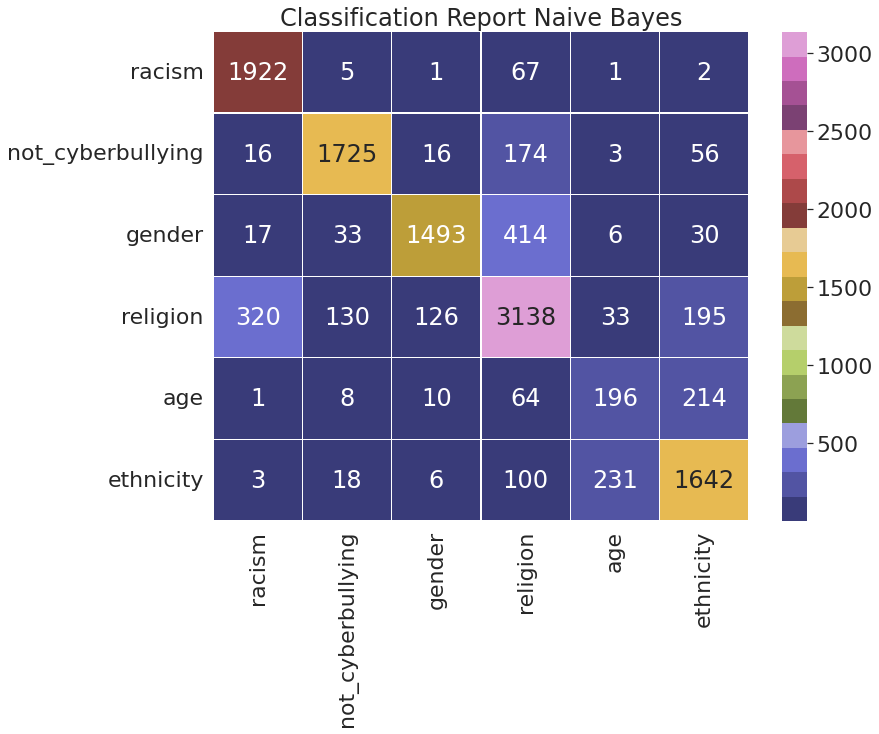

In [244]:
# true Write data values in each cell of the matrix
plt.figure(figsize=(12, 9))
sns.heatmap(cm_naive,annot=True,linewidths=0.30,cmap='tab20b',fmt="",xticklabels=labels, yticklabels=labels)
sns.set(font_scale=2)
plt.title("Classification Report Naive Bayes")
plt.savefig('confusion_naive.png')

In [51]:
print(classification_report(y_test,model.predict(x_test_transform)))

                   precision    recall  f1-score   support

              age       0.84      0.96      0.90      1998
        ethnicity       0.90      0.87      0.88      1990
           gender       0.90      0.75      0.82      1993
not_cyberbullying       0.79      0.80      0.79      3942
           racism       0.42      0.40      0.41       493
         religion       0.77      0.82      0.79      2000

         accuracy                           0.81     12416
        macro avg       0.77      0.77      0.77     12416
     weighted avg       0.82      0.81      0.81     12416



#Random Forest

In [52]:

from sklearn.ensemble import RandomForestClassifier

In [53]:

forest = RandomForestClassifier(random_state=42)

n_estimators: The number of decision trees in the random forest.

max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [54]:
forest.n_estimators

100

In [55]:
forest.fit(x_train_transform,y_train)

RandomForestClassifier(random_state=42)

In [56]:
forest_pred = forest.predict(x_test_transform)

In [57]:
type(vec.transform(['you are beautiful']).toarray())

numpy.ndarray

In [58]:
forest.predict(vec.transform(['you are beautiful']).toarray())

array(['not_cyberbullying'], dtype=object)

In [59]:
forest.predict(vec.transform(['muslim is like the idea of naziphobia']).toarray())

array(['religion'], dtype=object)

In [60]:
forest.predict(vec.transform(['you are black']).toarray())

array(['ethnicity'], dtype=object)

In [61]:
forest.predict(vec.transform(['they are awesome']).toarray())

array(['not_cyberbullying'], dtype=object)

In [62]:
forest.predict(vec.transform(['he is gay']).toarray())

array(['gender'], dtype=object)

In [63]:
forest.predict(vec.transform(['thanks for reply']).toarray())

array(['not_cyberbullying'], dtype=object)

In [64]:
forest_accuracy = accuracy_score(y_test, forest_pred)
forest_f1 = f1_score(y_test, forest_pred, average='weighted')
print('Accuracy (Random forest): ', "%.2f" % (forest_accuracy*100))
print('F1 (Random forest): ', "%.2f" % (forest_f1*100))

Accuracy (Random forest):  84.69
F1 (Random forest):  84.45


In [65]:
cm_forest = confusion_matrix(y_test,forest_pred)
print(cm_forest)

[[1909    1    0   88    0    0]
 [   3 1786   20  172    3    6]
 [   1    5 1651  323    9    4]
 [  35   33  209 3583   23   59]
 [   0    2   10   76   37  368]
 [   0   10    6  107  328 1549]]


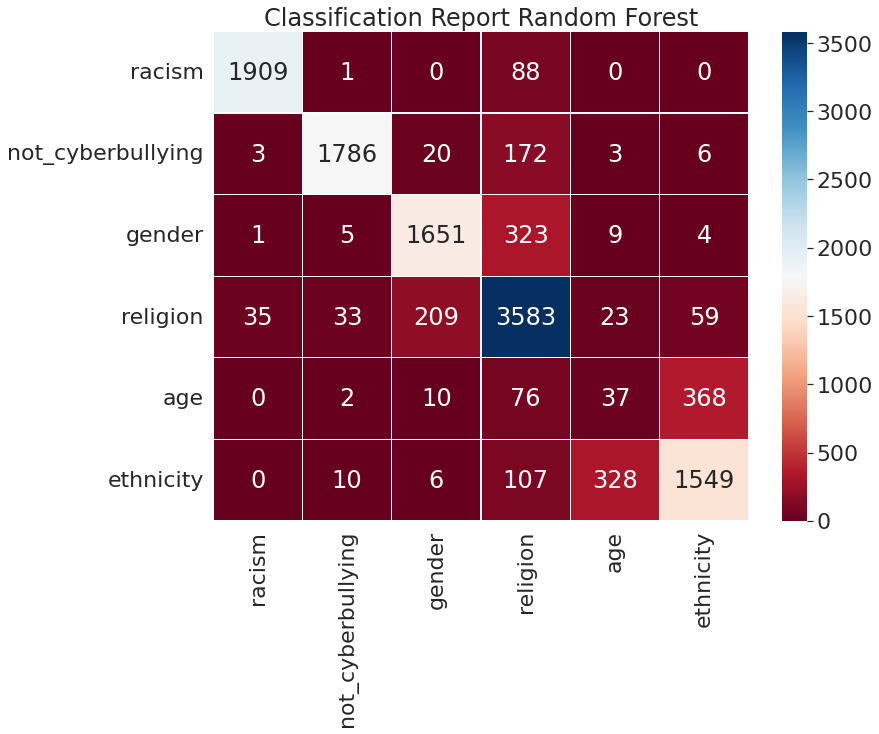

In [245]:
# true Write data values in each cell of the matrix
plt.figure(figsize=(12, 9))
sns.heatmap(cm_forest,annot=True,linewidths=0.30,cmap='RdBu',fmt="",xticklabels=labels, yticklabels=labels)
sns.set(font_scale=2)
plt.title("Classification Report Random Forest")
plt.savefig('confusion_randomForest.png')

In [67]:
print(classification_report(y_test,forest_pred))

                   precision    recall  f1-score   support

              age       0.98      0.96      0.97      1998
        ethnicity       0.97      0.90      0.93      1990
           gender       0.87      0.83      0.85      1993
not_cyberbullying       0.82      0.91      0.86      3942
           racism       0.09      0.08      0.08       493
         religion       0.78      0.77      0.78      2000

         accuracy                           0.85     12416
        macro avg       0.75      0.74      0.75     12416
     weighted avg       0.84      0.85      0.84     12416



# Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
model_dt = DecisionTreeClassifier(random_state=42)

In [70]:
model_dt.fit(x_train_transform,y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
decision_pred = model_dt.predict(x_test_transform)

In [72]:
model_dt.predict(vec.transform(['you are beautiful']).toarray())

array(['not_cyberbullying'], dtype=object)

In [73]:
model_dt.predict(vec.transform(['muslim is like the idea of naziphobia']).toarray())

array(['religion'], dtype=object)

In [74]:
model_dt.predict(vec.transform(['you are black']).toarray())

array(['ethnicity'], dtype=object)

In [75]:
model_dt.predict(vec.transform(['they are awesome']).toarray())

array(['not_cyberbullying'], dtype=object)

In [76]:
model_dt.predict(vec.transform(['he is gay']).toarray())

array(['gender'], dtype=object)

In [77]:
model_dt.predict(vec.transform(['thanks for reply']).toarray())

array(['gender'], dtype=object)

In [78]:
decision_accuracy = accuracy_score(y_test, decision_pred)
decision_f1 = f1_score(y_test, decision_pred, average='weighted')
print('Accuracy (Random forest): ', "%.2f" % (decision_accuracy*100))
print('F1 (Random forest): ', "%.2f" % (decision_f1*100))

Accuracy (Random forest):  81.90
F1 (Random forest):  82.23


In [79]:
cm_decision = confusion_matrix(y_test,decision_pred)
print(cm_decision)

[[1889    2    8   99    0    0]
 [   2 1783   38  143   13   11]
 [   3   13 1637  298   33    9]
 [  62   73  355 3335   80   37]
 [   0    6   10   71   90  316]
 [   4   13   15  134  399 1435]]


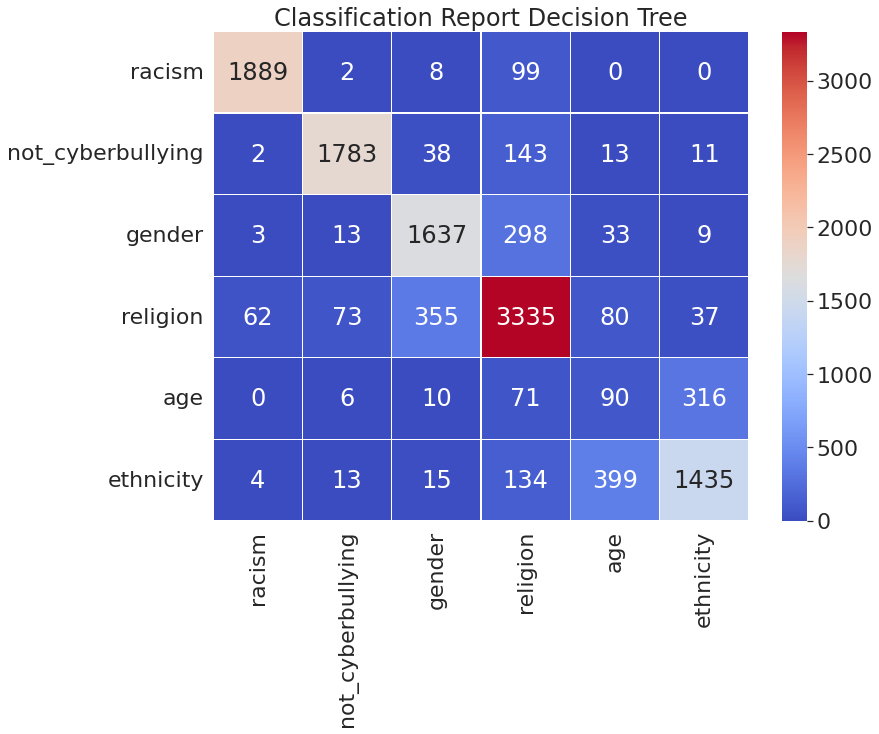

In [246]:
# true Write data values in each cell of the matrix
plt.figure(figsize=(12, 9))
sns.heatmap(cm_decision,annot=True,linewidths=0.30,cmap='coolwarm',fmt="",xticklabels=labels, yticklabels=labels)
sns.set(font_scale=2)
plt.title("Classification Report Decision Tree")
plt.savefig('confusion_decision.png')

In [81]:
print(classification_report(y_test,decision_pred))

                   precision    recall  f1-score   support

              age       0.96      0.95      0.95      1998
        ethnicity       0.94      0.90      0.92      1990
           gender       0.79      0.82      0.81      1993
not_cyberbullying       0.82      0.85      0.83      3942
           racism       0.15      0.18      0.16       493
         religion       0.79      0.72      0.75      2000

         accuracy                           0.82     12416
        macro avg       0.74      0.73      0.74     12416
     weighted avg       0.83      0.82      0.82     12416



#Adaboost Classifier

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
#from sklearn.svm import SVC
#svc=SVC(probability=True, kernel='linear')

In [84]:
#model_ada = AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,random_state=42)
model_ada = AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=42)

In [85]:
model_ada.fit(x_train_transform, y_train)

AdaBoostClassifier(learning_rate=1, random_state=42)

In [86]:
boost_pred = model_ada.predict(x_test_transform)

In [87]:
model_ada.predict(vec.transform(['you are beautiful']).toarray())

array(['not_cyberbullying'], dtype=object)

In [88]:
model_ada.predict(vec.transform(['muslim is like the idea of naziphobia']).toarray())

array(['religion'], dtype=object)

In [89]:
model_ada.predict(vec.transform(['you are black']).toarray())

array(['ethnicity'], dtype=object)

In [90]:
model_ada.predict(vec.transform(['they are awesome']).toarray())

array(['not_cyberbullying'], dtype=object)

In [91]:
model_ada.predict(vec.transform(['he is gay']).toarray())

array(['not_cyberbullying'], dtype=object)

In [92]:
model_ada.predict(vec.transform(['thanks for reply']).toarray())

array(['not_cyberbullying'], dtype=object)

In [93]:
boost_accuracy = accuracy_score(y_test, boost_pred)
boost_f1 = f1_score(y_test, boost_pred, average='weighted')
print('Accuracy (Random forest): ', "%.2f" % (boost_accuracy*100))
print('F1 (Random forest): ', "%.2f" % (boost_f1*100))

Accuracy (Random forest):  84.13
F1 (Random forest):  83.48


In [94]:
cm_boost = confusion_matrix(y_test,boost_pred)
print(cm_boost)

[[1801   14    2  179    0    2]
 [   2 1769   11  200    0    8]
 [   4   17 1533  429    2    8]
 [  58   28   91 3684   12   69]
 [   0    7    6  285   71  124]
 [   1   19   10  312   71 1587]]


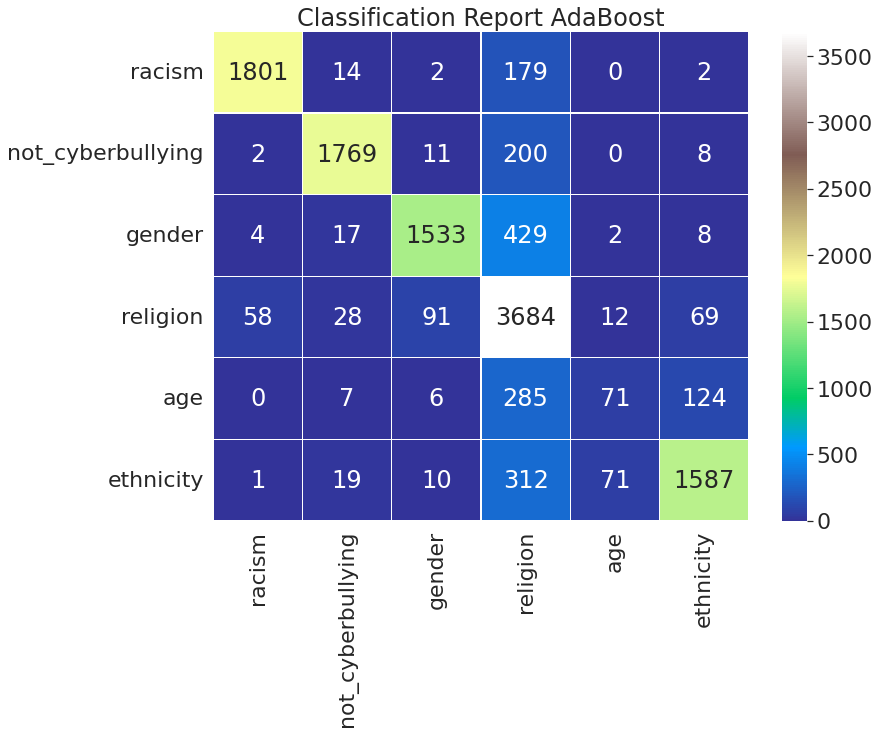

In [247]:
# true Write data values in each cell of the matrix
plt.figure(figsize=(12, 9))
sns.heatmap(cm_boost,annot=True,linewidths=0.30,cmap='terrain',fmt="",xticklabels=labels, yticklabels=labels)
sns.set(font_scale=2)
plt.title("Classification Report AdaBoost")
plt.savefig('confusion_adaboost.png')

In [96]:
print(classification_report(y_test,boost_pred))

                   precision    recall  f1-score   support

              age       0.97      0.90      0.93      1998
        ethnicity       0.95      0.89      0.92      1990
           gender       0.93      0.77      0.84      1993
not_cyberbullying       0.72      0.93      0.82      3942
           racism       0.46      0.14      0.22       493
         religion       0.88      0.79      0.84      2000

         accuracy                           0.84     12416
        macro avg       0.82      0.74      0.76     12416
     weighted avg       0.85      0.84      0.83     12416



### ROC Curve

In [148]:
# For Multi Outputs
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


# label encoder y
encoder = LabelEncoder()
encoder.fit(y_train)
y_train1 = encoder.transform(y_train)
y_train1 = np_utils.to_categorical(y_train1)

In [149]:
y_test1 = encoder.transform(y_test)
y_test1 = np_utils.to_categorical(y_test1)

In [165]:
# predict probabilities
pred_prob1 = model.predict_proba(x_test_transform) #NaiveBayes
pred_prob2 = forest.predict_proba(x_test_transform) #RandomForest
pred_prob3 =  model_dt.predict_proba(x_test_transform) #DecisionTree
pred_prob4 = model_ada.predict_proba(x_test_transform) #AdaBoost


In [185]:
#%% ROC-AUC Curve

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 6 # number of class


In [193]:
fpr1 = dict()
fpr2 = dict()
fpr3 = dict()
fpr4 = dict()

tpr1 = dict()
tpr2 = dict()
tpr3 = dict()
tpr4 = dict()

roc_auc1 = dict()
roc_auc2 = dict()
roc_auc3 = dict()
roc_auc4 = dict()

for i in range(n_classes):
    fpr1[i], tpr1[i], _ = roc_curve(y_test1[:, i], pred_prob1[:, i], )
    roc_auc1[i] = auc(fpr1[i], tpr1[i])

for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y_test1[:, i], pred_prob2[:, i], )
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

for i in range(n_classes):
    fpr3[i], tpr3[i], _ = roc_curve(y_test1[:, i], pred_prob3[:, i], )
    roc_auc3[i] = auc(fpr3[i], tpr3[i])

for i in range(n_classes):
    fpr4[i], tpr4[i], _ = roc_curve(y_test1[:, i], pred_prob4[:, i], )
    roc_auc4[i] = auc(fpr4[i], tpr4[i])


# Compute micro-average ROC curve and ROC area
fpr1["micro"], tpr1["micro"], _ = roc_curve(y_test1.ravel(), pred_prob1.ravel())
roc_auc1["micro"] = auc(fpr1["micro"], tpr1["micro"])

fpr2["micro"], tpr2["micro"], _ = roc_curve(y_test1.ravel(), pred_prob2.ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"])

fpr3["micro"], tpr3["micro"], _ = roc_curve(y_test1.ravel(), pred_prob3.ravel())
roc_auc3["micro"] = auc(fpr3["micro"], tpr3["micro"])

fpr4["micro"], tpr4["micro"], _ = roc_curve(y_test1.ravel(), pred_prob4.ravel())
roc_auc4["micro"] = auc(fpr4["micro"], tpr4["micro"])

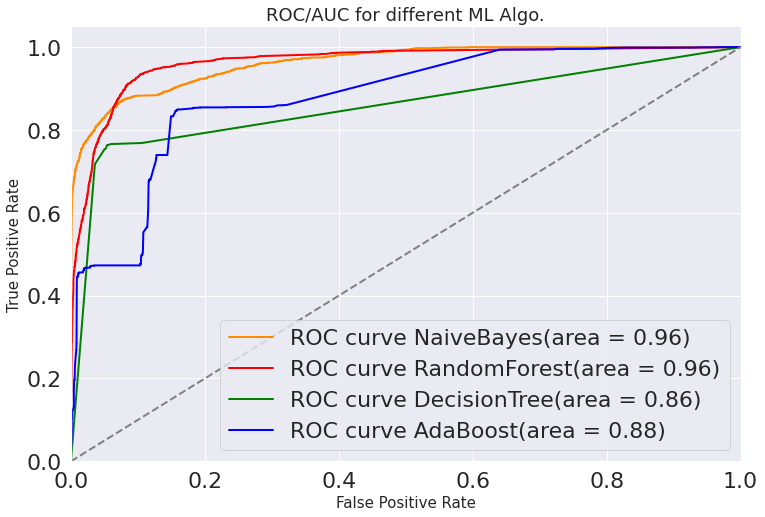

<Figure size 432x288 with 0 Axes>

In [252]:
from numpy.core.fromnumeric import size
sns.set(font_scale=2)
plt.figure(figsize=(12, 8))
lw = 2 # line_width
plt.plot(fpr1[5], tpr1[5], color='darkorange',
         lw=lw, label='ROC curve NaiveBayes(area = %0.2f)' % roc_auc1[5]) 

plt.plot(fpr2[5], tpr2[5], color='red',
         lw=lw, label='ROC curve RandomForest(area = %0.2f)' % roc_auc2[5]) 

plt.plot(fpr3[5], tpr3[5], color='green',
         lw=lw, label='ROC curve DecisionTree(area = %0.2f)' % roc_auc3[5]) 

plt.plot(fpr4[5], tpr4[5], color='blue',
         lw=lw, label='ROC curve AdaBoost(area = %0.2f)' % roc_auc4[5]) 


plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',size=15)
plt.ylabel('True Positive Rate',size=15)
plt.title('ROC/AUC for different ML Algo.',size=18)
plt.legend(loc="lower right")
plt.show()

plt.savefig('ROC_AUC_Curve.png')